In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
df=pd.read_csv("c:/data/titanic/train3.csv")
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [3]:
df.columns

Index(['Survived', 'Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age',
       'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [4]:
df.shape

(891, 10)

In [5]:
df.describe()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.242424,0.206510,0.551066,0.647587,0.352413,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.428790,0.405028,0.497665,0.477990,0.477990,13.002570,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.groupby("Survived").mean()

,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Survived,,,,,,,,,
0,0.145719,0.176685,0.677596,0.852459,0.147541,30.483607,0.553734,0.329690,22.117887
1,0.397661,0.254386,0.347953,0.318713,0.681287,28.595526,0.473684,0.464912,48.395408


Text(0, 0.5, '빈도')

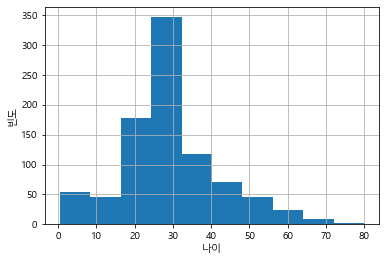

In [7]:
df["Age"].hist()
plt.xlabel('나이')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

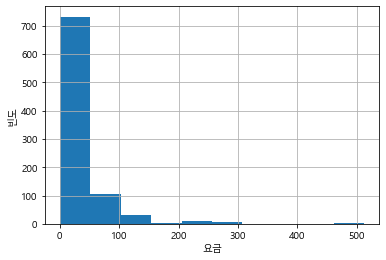

In [8]:
df["Fare"].hist()
plt.xlabel('요금')
plt.ylabel('빈도')

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 사망, 1: 생존)')

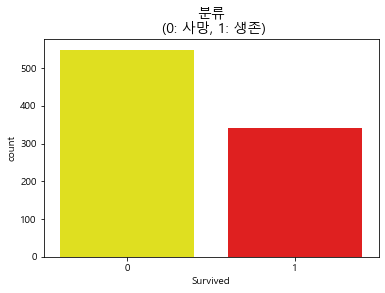

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
colors=["yellow", "red"]

sns.countplot('Survived', data=df, palette=colors)
plt.title('분류\n (0: 사망, 1: 생존)', fontsize=14)

In [10]:
train_cols=df.columns[1:]
X=df[train_cols]
y=df['Survived']

In [11]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Survived'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [12]:
from imblearn.over_sampling import SMOTE
X_sample, y_sample = SMOTE(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Survived'])
df2=pd.concat([X_samp,y_samp],axis=1)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 사망, 1: 생존)')

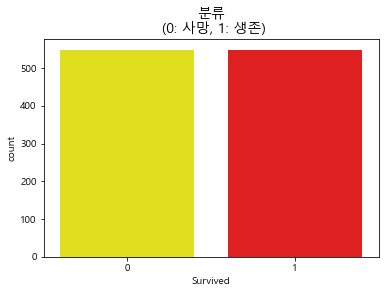

In [13]:
colors=["yellow","red"]
sns.countplot('Survived',data=df2, palette=colors)
plt.title('분류\n (0: 사망, 1: 생존)', fontsize=14)

In [14]:
train_cols=df.columns[1:]

X=X_samp[train_cols]
y=y_samp["Survived"]

In [15]:
model= sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.450132
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.351      
Dependent Variable: Survived         AIC:              1006.4895  
Date:               2021-12-08 16:04 BIC:              1051.5008  
No. Observations:   1098             Log-Likelihood:   -494.24    
Df Model:           8                LL-Null:          -761.08    
Df Residuals:       1089             LLR p-value:      4.1907e-110
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
--------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
--------------------------------------------------------------------
Pclass1     2.2377     0.3859    5.7985   0.0000    1.4813    2.9940
Pclass2     1.6164     0.3309    4.8854   0.0

In [16]:
train_cols = ['Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age']
X=df[train_cols]
y=df["Survived"]

In [17]:
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.451883
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.321     
Dependent Variable: Survived         AIC:              815.2554  
Date:               2021-12-08 16:04 BIC:              839.2171  
No. Observations:   891              Log-Likelihood:   -402.63   
Df Model:           4                LL-Null:          -593.33   
Df Residuals:       886              LLR p-value:      2.9022e-81
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass1    1.5866        nan       nan      nan       nan       nan
Pclass2    0.4634        nan       nan      nan       nan 

In [18]:
train_cols=df.columns[1:]

X=X_samp[train_cols]
y=y_samp["Survived"]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
print("학습용:",model.score(X_train, y_train)) 
print("검증용:",model.score(X_test, y_test))

학습용: 0.8154897494305239
검증용: 0.8045454545454546


In [21]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test,pred)

In [22]:
df_cm=pd.DataFrame(cm, index=['사망','생존'],  columns=['사망', '생존']) 
df_cm

,사망,생존
사망,92,20
생존,23,85


C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-pack

<AxesSubplot:title={'center':'Confusion Matrix'}>

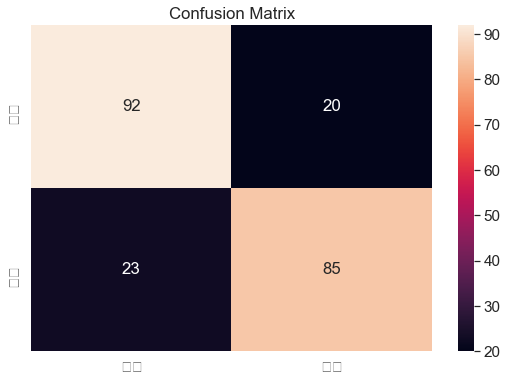

In [23]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)

In [24]:
import numpy as np

person1 = np.array([0, 0, 1, 1, 0, 19, 1, 0, 50]).reshape(1,9)
person2 = np.array([1, 0, 0, 0, 1, 17, 0, 2, 30]).reshape(1,9)
person3 = np.array([0, 1, 0, 0, 1, 40, 2, 0, 70]).reshape(1,9)
print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))


[0]
[1]
[1]


In [26]:
import joblib
joblib.dump(model, 'c:/data/titanic/titanic_logit.model')

['c:/data/titanic/titanic_logit.model']